# Viral Tweet Analysis

## Steps
1. Install dependencies
2. Collect tweets using `search term` and `oldest tweet ID` collect all matched tweets.
3. Save results to `json`, `csv`, and `npy` (list of unique IDs)
4. Clean results and build sentiment analysis 
5. Convert sentiment analysis to Pandas DataFrame
6. Scatter plot sentiment analysis
7. Merge and munge json files (using munge notebook)

# Install Dependencies

## packages needed:
 - tweepy (python library to access Twitter API)
 - json (display results in json format)
 - numpy (saving large dimensional arrays)
 - pandas (data frames)
 - vaderSentiment (Sentiment Analysis)

## Keys
 - Create a Twitter developer account and create an app to create custom keys

In [115]:
pip install tweepy
pip install vaderSentiment

SyntaxError: invalid syntax (<ipython-input-115-464fd45a2afd>, line 1)

In [116]:
# Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

## Keys
consumer_key = "YCAbNeDi1vIskDZSx3yiNSGHP"
consumer_secret = "eqI3k25FZR7hbEAmd1bReFYInpAUpjTEtlPWTkHdwV4Gk4W4jp"
access_token = "13773872-76rWdfYgViSsOPsNlwCBDVgxgMe3smYmWY9BE1a8W"
access_token_secret = "bjp9p182OO9TQQbk0VKlwyfiESAlozqFqJhbsMEb29pRm"

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

# 2. Collect tweets using `search term` and `oldest tweet ID` collect all matched tweets

## Variable Inputs:

### search_term
-  Enter whatever custom search term you desire to search for...

### oldest_tweet
-  Enter in a tweet id for the most recent tweet id you want to search for, so all tweets gathered while executing will have a tweet id > oldest_tweet
---------------------------------------------------------------------------------------------------------------------
## Cell Outputs:

### Print the number of tweets collected.
-  If you are not hitting any query limits, this code should collect 5,000 tweets.

### Print the total number of items in the TempDict list.
-  This value should match the total number of tweets collected (counter).

### Print the total number of unique tweet ids'.
-  This value should also match the total number of tweets and number of items in the TempDict list.

In [129]:
#---------------------------------
# Execute Search
#---------------------------------

# Search for People Tweeting about _____________
search_term = "~$ 2020 restart"

# Create variable for holding the oldest tweet
oldest_tweet = 1250596909724528640

# List to hold unique IDs
unique_ids = []
TempDict = []

# Counter to keep track of the number of tweets retrieved
counter = 0

# Loop through 5 times (total of 5000 tweets)
for x in range(50):

    # Retrieve 100 most recent tweets -- specifying a max_id
    public_tweets = api.search(search_term, 
                               count=100, 
                               result_type="recent", 
                               max_id=oldest_tweet)

    # Print Tweets
    for tweet in public_tweets["statuses"]:
        tweet_id = tweet["id"]
        
        if tweet_id not in unique_ids:
            unique_ids.append(tweet_id)
            TempDict.append(tweet)

                        
            # Increase counter by 1
            counter += 1

        # Reassign the the oldest tweet (i.e. the max_id)
        # Subtract 1 so the previous oldest isn't included
        # in the new search
        oldest_tweet = tweet_id - 1
print(f"There were a total of {counter} tweets captured")
print(f"There are a total of {len(TempDict)} objects in the dictionary")
print(f"There are a total of {len(unique_ids)} unique ids")


There were a total of 4990 tweets captured
There are a total of 4990 objects in the dictionary
There are a total of 4990 unique ids


In [130]:
#########################
# Verify Run
########################

# Number of Unique ID's Collected
len(unique_ids)
print(f"Number of Unique IDs:            {len(unique_ids)}")

# Number of ID's Pulled in latest run
print(f"Number of ID's Pulled in Run:    {len(TempDict)}")

# Oldest Tweet Number
print(f"The current oldest tweet is:     {oldest_tweet}")

Number of Unique IDs:            4990
Number of ID's Pulled in Run:    4990
The current oldest tweet is:     1250169844764311551


# 2. Save Results

### Save json file
-  enter json file name in line 7 ("filename.json")

### Save csv file
-  enter csv file name in line 6 ('filename.csv')

### Save id numbers
-  enter npy file name ('filename.npy')

### Print a single full tweet response
-  You can change the integer in FirstEntries[0] to any number between 0 and the one number less than the number of tweets collected.
- i.e., if 5,000 tweets were collected, you can change the 0 to any number between 0 - 4999, or pick a range of numbers (0:5). Each tweet response is very large, so you probably only want to print a single tweet response just to verify what has been collected.

In [131]:
#########################
### Save TempDict as JSON File
#########################

import json
json978 = json.dumps(TempDict)
f = open("tweet_analysis/viral_tweet_analysis_0418.json", "w")
f.write(json978)
f.close
print("The json file was saved successfully")

The json file was probably saved successfully


In [132]:
#########################
### Create CSV File of DataFrame
#########################

TempDF = pd.DataFrame.from_dict(TempDict)
TempDF.to_csv('tweet_analysis/viral_tweet_analysis_0418.csv')
print("The json file was successfully saved as a CSV")

The json file was successfully saved as a CSV


In [133]:
#########################
### Saving Unique ID Numbers to Numpy File
#########################

# unique_ids.tofile('viral_tweet_analysis.dat')

np.save('tweet_analysis/viral_tweet_analysis_0418.npy', unique_ids)

In [134]:
#########################
### Print First Full Tweet Response to Inspect
#########################

FirstEntries = TempDict[0:10]
FirstEntries[0]

{'created_at': 'Thu Apr 16 01:28:32 +0000 2020',
 'id': 1250596909724528640,
 'id_str': '1250596909724528640',
 'text': '~$ 2020 restart \n~$ restart 2020\n~$ 2020 restart -f\n~$ sudo 2020 restart \n\n🤔\n\n~$ sudo kill -9 2020\n~$ rm-rf ~/year/… https://t.co/zg1BgBNrDN',
 'truncated': True,
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [{'url': 'https://t.co/zg1BgBNrDN',
    'expanded_url': 'https://twitter.com/i/web/status/1250596909724528640',
    'display_url': 'twitter.com/i/web/status/1…',
    'indices': [117, 140]}]},
 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 13773872,
  'id_str': '13773872',
  'name': 'Jason Hand',
  'screen_name': 'jasonhand',
  

# 3. Sentiment Analysis

### Loading json files:
 - you can load as many data files as you want. Currently this notebook is configured to load 2 data files.

In [135]:
##########################################################################################################
#Dependencies for Cleaning Data
##########################################################################################################

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from pprint import pprint
Sentiments = []

In [136]:
with open('tweet_analysis/viral_tweet_analysis_0418.json') as f:
    data = json.load(f)
print(f"There are {len(data)} entries in data")

There are 4990 entries in data


In [125]:
with open('tweet_analysis/viral_tweet_analysis_0418.json') as g:
    data2 = json.load(g)

print(f"There are {len(data2)} entries in data2")

There are 4989 entries in data2


In [126]:
### Merge the two data lists (you can add as many data lists together as you want in this step)

mergedlist = data + data2
print(f"There are {len(mergedlist)} entries in the merged list")

There are 9978 entries in the merged list


In [127]:
### Print off the 1st entry of the merged list

pprint(mergedlist[0])

{'contributors': None,
 'coordinates': None,
 'created_at': 'Thu Apr 16 01:28:32 +0000 2020',
 'entities': {'hashtags': [],
              'symbols': [],
              'urls': [{'display_url': 'twitter.com/i/web/status/1…',
                        'expanded_url': 'https://twitter.com/i/web/status/1250596909724528640',
                        'indices': [117, 140],
                        'url': 'https://t.co/zg1BgBNrDN'}],
              'user_mentions': []},
 'favorite_count': 6771,
 'favorited': False,
 'geo': None,
 'id': 1250596909724528640,
 'id_str': '1250596909724528640',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
 'place': {'attributes': {},
           'bounding_box': {'coordinates': [[[-105.1048583, 40.000226],
                                        

In [ ]:
#########################
# Begin Cleanning Process - Return is LOCAL PRINTING - NOT Saving to Files
#########################

list_num = 0

#### Begin Loop through Tweets

for x in TempDict:
    print(f"Tweet Number:   {list_num}")
##########################################################################################################

    #### Created At:
    created_at = x['created_at']
    print(f"Created At:     {created_at}")
##########################################################################################################

    #### Tweet Text
    Tweet_Text = x['text']
    print("-"*50)
    print(f"Tweet Text:     {Tweet_Text}")
    print("-"*50)
##########################################################################################################

    #### Run Vader Analysis
    results = analyzer.polarity_scores(x['text'])
    compound = results['compound']
    pos = results["pos"]
    neu = results["neu"]
    neg = results["neg"]
    
    #### Add results to Sentiments List
    Sentiments.append({"Date": tweet["created_at"], 
                        "compound": compound,
                        "Positive": pos,
                        "Negative": neu,
                        "Neutral": neg,
                        "Tweets Ago": list_num})
    print("Sentiment Analysis Results for Tweet Text:")
    print(f"The Compound Score is:     {compound}")
    print(f"The Positive Score is:     {pos}")
    print(f"The Negative Score is:     {neu}")
    print(f"The Neutral Score is:      {neg}")
    print("-"*50)
    

##########################################################################################################

    #### ReTweet Count
    try:
        tweet_reTweet = x['retweet_count']
    except:
        print(f"Re-Tweeted:     {retweet_count} times")

##########################################################################################################

    #### Favorite Count
    try:
        favorite_count = x['retweeted_status']['favorite_count']
    except (IndexError, KeyError):
        favorite_count = 'null'
    
##########################################################################################################

    #### Hashtags
    print("Hashtags Used:")
          
    # Hashtag1
    try: 
        hashtag1 = x['entities']['hashtags'][0]['text']
    except IndexError:
        hashtag1 = 'null'
    print(f"        HashTag1:     {hashtag1}")
          
    # Hashtag2
    try: 
        Hashtag2 = x['entities']['hashtags'][1]['text']
    except IndexError:
        Hashtag2 = 'null'
    print(f"        HashTag2:     {Hashtag2}")
          
    # Hashtag3
    try: 
        Hashtag3 = x['entities']['hashtags'][2]['text']
    except IndexError:
        Hashtag3 = 'null'
    print(f"        HashTag3:     {Hashtag3}")
        
    # Hashtag4
    try: 
        Hashtag4 = x['entities']['hashtags'][3]['text']
    except IndexError:
        Hashtag4 = 'null'
    print(f"        Hashtag4:     {Hashtag4}")
    
##########################################################################################################

    ##### Gathering Mentioned Screen Name and Names
    print("Tweet Mentions:")
    # Mentioned Entry 1
    try: 
        screenname1 = x['entities']['user_mentions'][0]['screen_name']
    except IndexError:
        screenname1 = 'null'
    print(f"        Mention 1:  screenname1:  {screenname1}")
    try: 
        name1 = x['entities']['user_mentions'][0]['name']
    except IndexError:
        name1 = 'null'
    print(f"        Mention 1:  name1:        {name1}")

    # Mentioned Entry 2
    try: 
        screenname2 = x['entities']['user_mentions'][1]['screen_name']
    except IndexError:
        screenname2 = 'null'
    print(f"        Mention 2:  screenname2:  {screenname2}")
    try: 
        name2 = x['entities']['user_mentions'][1]['name']
    except IndexError:
        name2 = 'null'
    print(f"        Mention 2:  name2:        {name2}")

    # Mentioned Entry 3
    try: 
        screenname3 = x['entities']['user_mentions'][2]['screen_name']
    except IndexError:
        screenname3 = 'null'
    print(f"        Mention 3:  screenname3:  {screenname3}")
    try: 
        name3 = x['entities']['user_mentions'][2]['name']
    except IndexError:
        name3 = 'null'
    print(f"        Mention 3:  name3:        {name3}")

    # Mentioned Entry 4
    try: 
        screenname4 = x['entities']['user_mentions'][3]['screen_name']
    except IndexError:
        screenname4 = 'null'
    print(f"        Mention 4:  screenname4:  {screenname4}")
    try: 
        name4 = x['entities']['user_mentions'][3]['name']
    except IndexError:
        name4 = 'null'
    print(f"        Mention 4:  name4:        {name4}")
##########################################################################################################
   
    #### Begin User Profile Section
    print("-"*50)
    print("Begin User Profile Section")


##########################################################################################################
    #### Account name
    User_Name = x['user']['name']
    print(f"User_Name:               {User_Name}")

##########################################################################################################

    #### Screen Name
    Screen_Name = x['user']['screen_name']
    print(f"Screen Name:             {Screen_Name}")

##########################################################################################################

    #### User Description
    User_Description = x['user']['description']
    print(f"User Description:        {User_Description}")

##########################################################################################################

    #### User location
    try:
        User_Location = x['user']['location']
    except:
        User_Location = 'null'
    print(f"User Location:           {User_Location}")

##########################################################################################################

    #### User Following Count (how many people are they following)
    User_FollowersCt = x['user']['followers_count']
    print(f"User Followers Count:    {User_FollowersCt}")

##########################################################################################################

    #### User Followed Count (how many people are following the user)
    User_FriendsCt = x['user']['friends_count']
    print(f"User Friends Count:      {User_FriendsCt}")

##########################################################################################################

    #### User Verified
    User_Verified = x['user']['verified']
    print(f"User Verfied:            {User_Verified}")

##########################################################################################################

    #### User_Geo
    try:
        User_Geo = x['geo']
    except:
        User_Geo = 'null'
    print(f"User Geo:                {User_Geo}")

########################################################################################################## 

    #### User_Place
    try:
        User_Place = x['place']
    except:
        User_Place = 'null'
    print(f"User Place:              {User_Place}")

##########################################################################################################

    #### Begin Meta Section
    print("-"*50)
    print("Begin Meta Section")

##########################################################################################################

    #### Tweet_ID
    Tweet_ID = x['id']
    print(f"Tweet ID:                {Tweet_ID}")
    
##########################################################################################################

    #### Tweet_ID_Str
    Tweet_ID_str = x['id_str']
    print(f"Tweet ID str:            {Tweet_ID_str}")
    
##########################################################################################################

    #### ReTweet_ID
    try:
        ReTweet_ID = x['retweeted_status']['id']
    except:
        ReTweet_ID = 'null'
    print(f"ReTweet_ID:              {ReTweet_ID}")
    
##########################################################################################################

    #### ReTweet_ID_Str
    try:
        ReTweet_ID_str = x['retweeted_status']['id_str']
    except:
        ReTweet_ID_str = 'null'
    print(f"ReTweet_ID str:          {ReTweet_ID_str}")
    
##########################################################################################################

    #### Coordinates
    try:
        coordinates = x['coordinates']
    except:
        coordinates = 'null'
    print(f"Coordinates:             {coordinates}")
    
##########################################################################################################
    
    
    ## Print end of tweet ---
    print("*"*75)
    list_num = list_num + 1

In [141]:
#############################
#### Post Cleaning Analysis
#############################

# How many entries in the Sentiment List
print(f"Number of items in Sentiments List:     {len(Sentiments)}")

Number of items in Sentiments List:     4990


In [142]:
############################
#### Convert Sentiment List into DF
############################

sentiments_pd = pd.DataFrame.from_dict(Sentiments)
sentiments_pd.head()


,Date,Negative,Neutral,Positive,Tweets Ago,compound
0,Tue Apr 14 21:11:32 +0000 2020,0.836,0.164,0.000,0,-0.6908
1,Tue Apr 14 21:11:32 +0000 2020,0.752,0.000,0.248,1,0.7395
2,Tue Apr 14 21:11:32 +0000 2020,0.698,0.000,0.302,2,0.3802
3,Tue Apr 14 21:11:32 +0000 2020,0.838,0.000,0.162,3,0.5410
4,Tue Apr 14 21:11:32 +0000 2020,1.000,0.000,0.000,4,0.0000


In [143]:
############################
#### Summary Stats of Sentiments DF
############################

print(f"The Median Compound Score is:    {sentiments_pd['compound'].median()}")
print(f"The Median Negative Score is:    {sentiments_pd['Negative'].median()}")
print(f"The Median Positive Score is:    {sentiments_pd['Positive'].median()}")
print(f"The Median Neutral Score is:    {sentiments_pd['Neutral'].median()}")

print(f"The Mean Compound Score is:    {sentiments_pd['compound'].mean()}")
print(f"The Mean Negative Score is:    {sentiments_pd['Negative'].mean()}")
print(f"The Mean Positive Score is:    {sentiments_pd['Positive'].mean()}")
print(f"The Mean Neutral Score is:    {sentiments_pd['Neutral'].mean()}")

The Median Compound Score is:    0.0
The Median Negative Score is:    1.0
The Median Positive Score is:    0.0
The Median Neutral Score is:    0.0
The Mean Compound Score is:    0.056475490981964006
The Mean Negative Score is:    0.9449450901803651
The Mean Positive Score is:    0.03816873747494978
The Mean Neutral Score is:    0.016880761523046066


In [144]:
##########################################################################################################
#Dependencies Plotting with Matplotlib
##########################################################################################################

from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.pyplot import figure
style.use('ggplot')


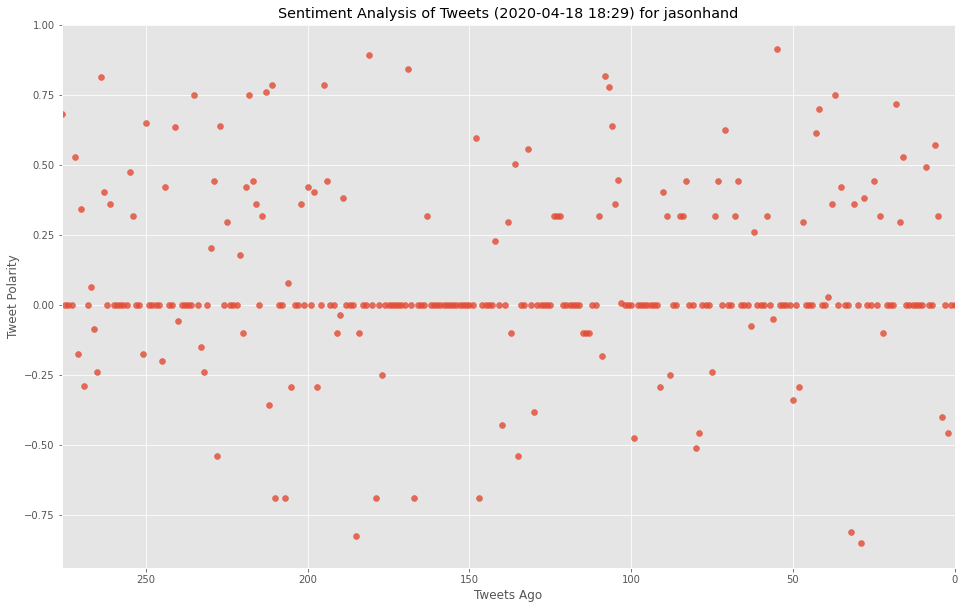

In [74]:
# Create plot
fig = plt.figure(figsize=(16,10))
x_vals = sentiments_pd["Tweets Ago"]
y_vals = sentiments_pd["compound"]
plt.scatter(x_vals,
         y_vals,
         marker="o",
         linewidth=0.5,
         alpha=0.8        )

# # Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Sentiment Analysis of Tweets ({now}) for {search_term}")
plt.xlim([x_vals.max(),x_vals.min()]) #Bonus
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")



plt.show()

In [145]:
###########################
#### Save Figure
###########################

plt.savefig('test.png', bbox_inches = 'tight')

<Figure size 432x288 with 0 Axes>

In [ ]:
#################################################################################
#################################################################################
####### NOT for running - this is notes and the legand
#################################################################################

#     tweet['created_at']                               # Time Stamp of when tweet was created
#     tweet['id']                                       # tweet id Object (number)
#     tweet['id_str']                                   # tweet id String format (number)
#     tweet['text']                                     # text of tweet
#     tweet['entities']['hashtags']['text']             # hashtags taken
#     tweet['entities']['user_mentions']['screen_name'] # screen name of person mentioned
#     tweet['entities']['user_mentions']['name']        # name of person mentioned
#     tweet['user']['id']                               # id (object) of account user
#     tweet['user']['name']                             # name of account user
#     tweet['user']['screen_name']                      # Screen name of person
#     tweet['user']['location']                         # string, user input of their location
#     tweet['user']['description']                      # description of the account user
#     tweet['user']['followers_count']                  # number of accounts user is following
#     tweet['user']['friends_count']                    # number of accounts user is friends with
#     tweet['user']['verified']                         # is the account user 'verified'
#     tweet['geo']                                      # is geo null or on
#     tweet['coordinates']                              # coordinates or null
#     tweet['place']                                    # tweet place description or null
#     tweet['retweeted_status']['id']                   # Original tweet id number object
#     tweet['retweeted_status']['id_str']               # Original tweet id number string
#     tweet['retweet_count']                            # number of times an original tweet has been retweeted
#     tweet['retweeted_status']['favorite_count']       # number of times a tweet has been favorited